# Main

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from datetime import datetime

import requests
from bs4 import BeautifulSoup
import re as re
import time
import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Webscrapping

### Importing BBC webscrapping

In [ ]:
import src.BBC_webscrapping as bbc

In [ ]:
df_bbc_russia = bbc.keyword('Russia',200)
df_bbc_china = bbc.keyword('China',200)

### Importing CNN webscrapping

In [ ]:
import src.CNN_webscrapping as cnn

In [ ]:
df_cnn_russia = cnn.keyword('Russia',200)
df_cnn_china = cnn.keyword('China',200)

### Importing Peoples's  Daily Online

In [ ]:
import src.peoples_webscrapping as pdo

In [ ]:
df_united_states = pdo.keyword('United States',60)
df_usa = pdo.keyword('USA',60)
df_uk = pdo.keyword('UK',60)
df_united_kingdom = pdo.keyword('United Kingdom',60)

In [ ]:
df_pd_us=pd.concat([df_united_states,df_usa])
df_pd_uk=pd.concat([df_uk,df_united_kingdom])

### Importing RT webscrapping

In [ ]:
import src.RT_webscrapping as rt

In [ ]:
df_united_states = rt.keyword('United States',100)
df_usa = rt.keyword('USA',100)
df_united_kingdom = rt.keyword('United Kingdom',100)
df_uk = rt.keyword('uk',100)

In [ ]:
df_rt_us= pd.concat([df_united_states,df_usa])
df_rt_uk=pd.concat([df_united_kingdom,df_uk])

### - not required- Saving raw data into CSV 

In [ ]:
df_bbc_china.to_csv('data/raw/bbc_china.csv',index=False) 
df_bbc_russia.to_csv('data/raw/bbc_russia.csv',index=False)
df_cnn_china.to_csv('data/raw/cnn_china.csv',index=False)
df_cnn_russia.to_csv('data/raw/cnn_russia.csv',index=False)
df_pd_us.to_csv('data/raw/pdo_united_states.csv',index=False)
df_pd_uk.to_csv('data/raw/pdo_united_kingdom.csv',index=False) 
df_rt_us.to_csv('data/raw/rt_united_states.csv',index=False)  
df_rt_uk.to_csv('data/raw/rt_united_kingdom.csv',index=False)  

## Natural Languaje, Subjectivity and Polarity analysis

### Importing functions

In [2]:
import src.NLTK_analysis as nk

### - Not required - Importing raw files

In [3]:
df_bbc_china=pd.read_csv('data/raw/bbc_china.csv')
df_bbc_russia=pd.read_csv('data/raw/bbc_russia.csv')
df_cnn_china=pd.read_csv('data/raw/cnn_china.csv')
df_cnn_russia=pd.read_csv('data/raw/cnn_russia.csv')
df_pd_us=pd.read_csv('data/raw/pdo_united_states.csv')
df_pd_uk=pd.read_csv('data/raw/pdo_united_kingdom.csv')
df_rt_us=pd.read_csv('data/raw/rt_united_states.csv')
df_rt_uk=pd.read_csv('data/raw/rt_united_kingdom.csv')

### Applying to BBC

- China

In [4]:
df_bbc_china = nk.preprocess(df_bbc_china)
df_bbc_china=nk.add_column(df_bbc_china,'source','bbc')
df_bbc_china=nk.add_column(df_bbc_china,'topic','china')
df_bbc_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
25,"China and TikTok threaten US, intelligence chi...","China and TikTok threaten US, intelligence chi...",https://www.bbc.co.uk/news/world-us-canada-647...,10,3,2023,"[tiktok, intelligence, china, threaten, chiefs...",0.34375,-0.2125,10/3/2023,bbc,china


- Russia

In [5]:
df_bbc_russia = nk.preprocess(df_bbc_russia)
df_bbc_russia=nk.add_column(df_bbc_russia,'source','bbc')
df_bbc_russia=nk.add_column(df_bbc_russia,'topic','russia')
df_bbc_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
90,How Putin's fate is tied to Russia's war in Uk...,How Putin´s fate is tied to Russia´s war in Uk...,https://www.bbc.co.uk/news/world-europe-64744197,24,2,2023,"[putin, russia, ukraine, war, president, vladi...",0.345552,0.092212,24/2/2023,bbc,russia


### Applying to CNN

- China

In [6]:
df_cnn_china = nk.preprocess(df_cnn_china)
df_cnn_china=nk.add_column(df_cnn_china,'source','cnn')
df_cnn_china=nk.add_column(df_cnn_china,'topic','china')
df_cnn_china.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
36,IMF chief: Ukraine war will have 'devastating'...,IMF chief: Ukraine war will have 'devastating...,https://www.cnn.com/2023/03/08/economy/imf-kri...,8,3,2023,"[russia, economy, bank, jones, imf, markets, m...",0.308325,0.038948,8/3/2023,cnn,china


- Russia

In [7]:
df_cnn_russia = nk.preprocess(df_cnn_russia)
df_cnn_russia=nk.add_column(df_cnn_russia,'source','cnn')
df_cnn_russia=nk.add_column(df_cnn_russia,'topic','russia')
df_cnn_russia.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
45,"5 things to know for March 7: Winter snow, Jan...","5 things to know for March 7: Winter snow, Ja...",https://www.cnn.com/2023/03/07/us/five-things-...,7,3,2023,"[china, snow, january, twitter, things, winter...",0.376999,0.106413,7/3/2023,cnn,russia


### Applying to People's Daily Online

- United States of America

In [8]:
df_pd_us = nk.preprocess(df_pd_us)
df_pd_us=nk.add_column(df_pd_us,'source','pdo')
df_pd_us=nk.add_column(df_pd_us,'topic','usa')
df_pd_us.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
22,Lack of shelters for Los Angeles bus riders po...,Lack of shelters for Los Angeles bus riders po...,http://english.people.com.cn/n3/2023/0308/c900...,8,3,2023,"[bus, los, angeles, study, neighborhoods, lack...",0.419437,-0.009284,8/3/2023,pdo,usa


- United Kingdom

In [9]:
df_pd_uk = nk.preprocess(df_pd_uk)
df_pd_uk=nk.add_column(df_pd_uk,'source','pdo')
df_pd_uk=nk.add_column(df_pd_uk,'topic','uk')
df_pd_uk.sample()

,title,article,link,day,month,year,word,subjetivity,polarity,date,source,topic
6,"Chaos, distrust, frustration -- Three years on...","Chaos, distrust, frustration -- Three years on...",http://english.people.com.cn/n3/2023/0201/c900...,1,2,2023,"[brexit, britain, eu, ireland, british, northe...",0.403679,0.05069,1/2/2023,pdo,uk


### Applying to RT

- United States of America

In [10]:
df_rt_us = nk.preprocess(df_rt_us)
df_rt_us=nk.add_column(df_rt_us,'source','rt')
df_rt_us=nk.add_column(df_rt_us,'topic','usa')
df_rt_us.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
9,Polish president claims Nord Stream blasts wer...,Polish president claims Nord Stream bl...,https://www.rt.com/news/572660-poland-nord-str...,2023,3,8,"[duda, ukrainian, polish, president, nord, str...",0.454078,0.083291,8/3/2023,rt,usa


- United Kingdom

In [11]:
df_rt_uk = nk.preprocess(df_rt_uk)

df_rt_uk=nk.add_column(df_rt_uk,'source','rt')
df_rt_uk=nk.add_column(df_rt_uk,'topic','uk')
df_rt_uk.sample()

,title,article,link,year,month,day,word,subjetivity,polarity,date,source,topic
63,Turkey doesn’t want to be ‘Turkey’ anymore — R...,Turkey doesn’t want to be ‘Turkey’ any...,https://www.rt.com/news/556483-turkey-un-name-...,2022,6,2,"[turkey, country, rkiye, turkish, change, mace...",0.352652,-0.040909,2/6/2022,rt,uk


### Saving all the DF's in one for visualisation

In [12]:
df_together = pd.concat([df_bbc_china,df_bbc_russia,df_cnn_china,df_cnn_russia,df_pd_us,df_pd_uk,df_rt_us, df_rt_uk])
df_words = nk.list_words(df_together)

In [13]:
df_together.to_csv('data/dfcomplete.csv',index=False)
df_words.to_csv ('data/words.csv',index=False)

### wordcloud

In [14]:
import src.wordcloud as wc

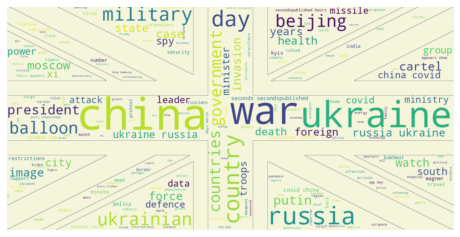

In [15]:
df_bbc=pd.concat([df_bbc_russia,df_bbc_china])
bbc_pic=wc.wordcloud(df_bbc,'uk.png')

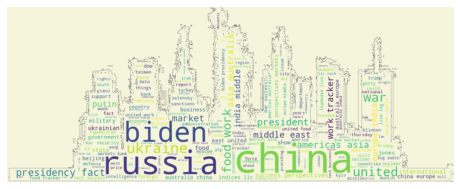

In [16]:
df_cnn=pd.concat([df_cnn_russia,df_cnn_china])
wc.wordcloud(df_cnn,'usa.png')

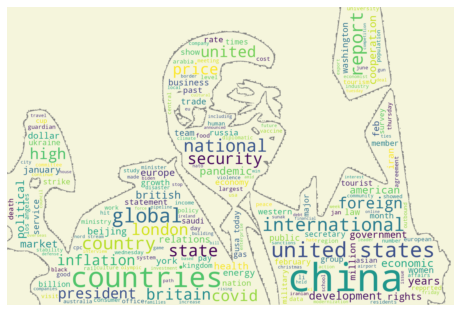

In [17]:
df_pd=pd.concat([df_pd_uk,df_pd_us])
wc.wordcloud(df_pd,'china.png')

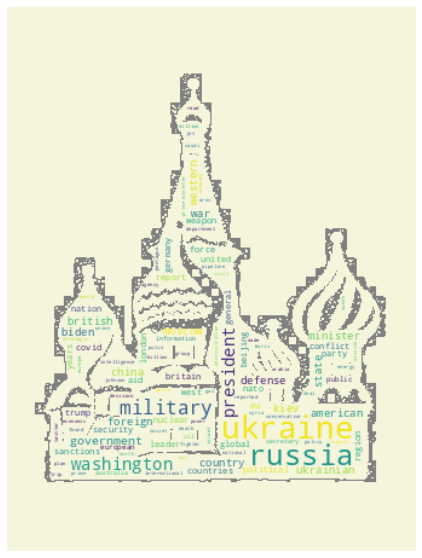

In [18]:
df_rt=pd.concat([df_rt_uk,df_rt_us])
wc.wordcloud(df_rt,'russia.png')

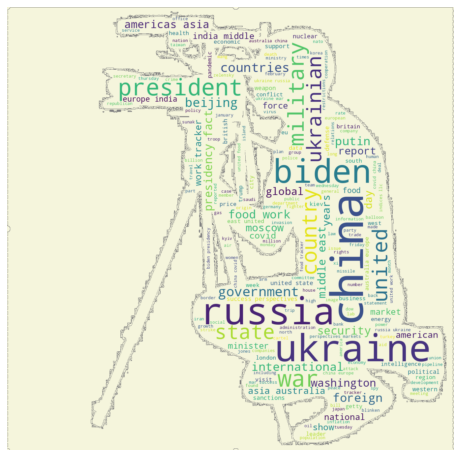

In [19]:
wc.wordcloud(df_together,'press.png')